In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df=pd.read_excel('final_feat.xlsx')

In [113]:
df.head()

,Day of week,Cost,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost / conv.,Search Impr. share,Search Lost IS (rank),Search Lost IS (budget),Created Date,Location Zip_x,Income_x,Year Month,Completed Jobs,Income_y,Lead Calls,Canceled Jobs_x,Future Scheduled Jobs,Location Zip_y,tech_count,Avg_job_per_day,county_name,TMAX,TMIN,Total Leads,Total Jobs,Avg Service,Avg Install,Canceled Jobs_y,Turn over %,Canceled %,Avg Sales,bookedjob,totalcalls,Booking rate
0,Thursday,3181.56,13361,156,0.0117,20.39,26.77,0.0486,118.86,0.5337,0.2676,0.1987,2020-01-02,90049,137581.58,2020 January,57,23933.54,60,8.0,63,90049,59,1,Los Angeles,65,51,10,101,143.417833,3224.412750,8,9.900990,7.920792,3617.444828,49,155,31.612903
1,Friday,2684.67,16841,160,0.0095,16.78,21.00,0.0299,127.84,0.5477,0.3122,0.1401,2020-01-03,92262,43204.73,2020 January,77,65232.03,64,7.0,81,92262,40,2,Riverside,71,44,9,89,75.515208,965.365854,7,10.112360,7.865169,1781.345385,56,176,31.818182
2,Saturday,1338.36,30788,142,0.0046,9.43,11.00,0.0186,121.67,0.5297,0.3158,0.1545,2020-01-04,92606,14709.40,2020 January,55,26195.32,58,4.0,61,92606,21,3,Orange,69,56,3,31,110.019048,1377.666667,4,9.677419,12.903226,459.248750,30,92,32.608696
3,Sunday,1192.31,12865,108,0.0084,11.04,5.00,0.0130,238.46,0.5741,0.3349,0.0910,2020-01-05,90638,3725.40,2020 January,6,264.00,32,1.0,6,90638,9,1,Los Angeles,69,52,2,15,67.914286,406.250000,1,13.333333,6.666667,846.000000,11,52,21.153846
4,Monday,2383.17,49514,188,0.0038,12.68,22.00,0.0566,108.33,0.6027,0.3596,0.0377,2020-01-06,90045,74598.75,2020 January,73,48506.16,62,5.0,82,90045,60,2,Los Angeles,77,60,8,91,78.753750,1646.943488,5,8.791209,5.494505,1820.060789,54,159,33.962264


In [114]:
df.columns

Index(['Day of week', 'Cost', 'Impressions', 'Clicks', 'CTR', 'Avg. CPC',
       'Conversions', 'Conv. rate', 'Cost / conv.', 'Search Impr. share',
       'Search Lost IS (rank)', 'Search Lost IS (budget)', 'Created Date',
       'Location Zip_x', 'Income_x', 'Year Month', 'Completed Jobs',
       'Income_y', 'Lead Calls', 'Canceled Jobs_x', 'Future Scheduled Jobs',
       'Location Zip_y', 'tech_count', 'Avg_job_per_day', 'county_name',
       'TMAX', 'TMIN', 'Total Leads', 'Total Jobs ', 'Avg Service',
       'Avg Install', 'Canceled Jobs_y', 'Turn over %', 'Canceled %',
       'Avg Sales', 'bookedjob', 'totalcalls', 'Booking rate'],
      dtype='object')

In [115]:
df.shape

(350, 38)

In [116]:
df1=df[['Completed Jobs','tech_count','TMAX','Avg Sales','Income_y']]
    

In [117]:
df1=df1.drop_duplicates(ignore_index=True)

In [118]:
df1.shape

(344, 5)

In [119]:
#Mean_encoded_subject =df1.groupby(['Location Zip_y'])['Income_y'].mean().to_dict() 
  
#df1['Zip_income'] = df1['Location Zip_y'].map(Mean_encoded_subject) 


#df1=df1.drop(['Location Zip_y'],axis=1)
  


In [120]:
df1.head()

,Completed Jobs,tech_count,TMAX,Avg Sales,Income_y
0,57,59,65,3617.444828,23933.54
1,77,40,71,1781.345385,65232.03
2,55,21,69,459.248750,26195.32
3,6,9,69,846.000000,264.00
4,73,60,77,1820.060789,48506.16


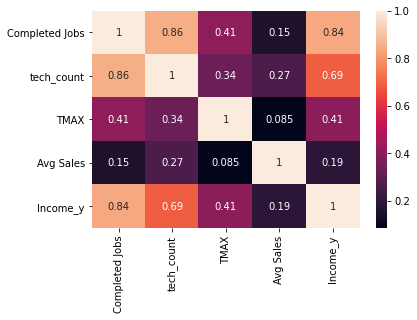

In [121]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [122]:
76**3*1.7543

770095.5967999999

In [123]:
df1.head()

,Completed Jobs,tech_count,TMAX,Avg Sales,Income_y
0,57,59,65,3617.444828,23933.54
1,77,40,71,1781.345385,65232.03
2,55,21,69,459.248750,26195.32
3,6,9,69,846.000000,264.00
4,73,60,77,1820.060789,48506.16


In [124]:

#df1['f1']=np.sqrt(df1['Completed Jobs']**3)*np.abs(df1['Avg Sales'])
#df1['f2']=np.abs(np.sqrt(df1['Completed Jobs']) - np.sqrt(df1['tech_count']))
#df1['f3']=np.log(np.sqrt(df1['Completed Jobs'])*df1['TMAX']**3)

In [125]:
df1.columns

Index(['Completed Jobs', 'tech_count', 'TMAX', 'Avg Sales', 'Income_y'], dtype='object')

In [126]:
#df1=df1[['f1','f2', 'f3','Income_y']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


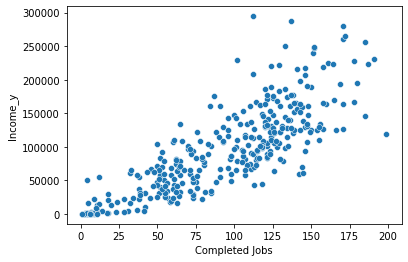

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


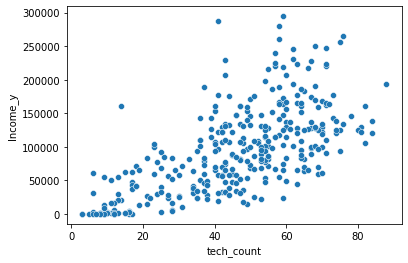

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


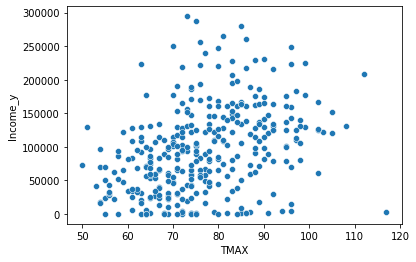

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


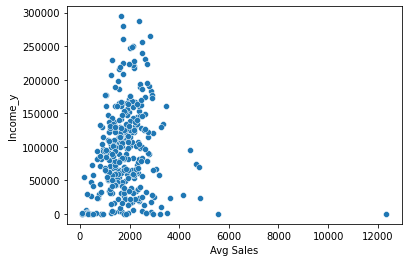

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


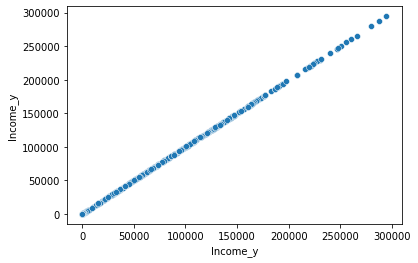

In [127]:
for i in df1.columns:
    sns.scatterplot(df1[i],df1['Income_y'])
    plt.show()

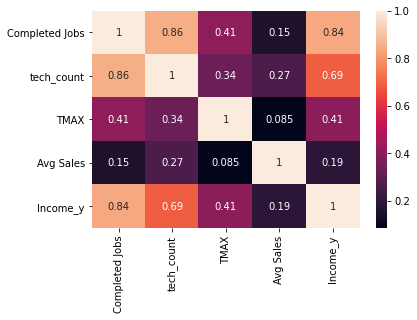

In [128]:
sns.heatmap(df1.corr(method='spearman'),annot=True)

In [129]:
train=df1[0:300]
test=df1[300:]

In [130]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [131]:
X.head()

,Completed Jobs,tech_count,TMAX,Avg Sales
0,57,59,65,3617.444828
1,77,40,71,1781.345385
2,55,21,69,459.248750
3,6,9,69,846.000000
4,73,60,77,1820.060789


In [132]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler




In [133]:
scaler=MinMaxScaler()

In [134]:
X=scaler.fit_transform(X)

In [135]:
X

array([[0.28282828, 0.65882353, 0.2238806 , 0.28783598],
       [0.38383838, 0.43529412, 0.31343284, 0.138097  ],
       [0.27272727, 0.21176471, 0.28358209, 0.03027636],
       ...,
       [0.61616162, 0.45882353, 0.13432836, 0.08728453],
       [0.24747475, 0.16470588, 0.08955224, 0.1091494 ],
       [0.02525253, 0.10588235, 0.26865672, 0.14553091]])

In [136]:

y=y.values
y=y.reshape(-1,1)

In [137]:

y=scaler.fit_transform(y)

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
from keras.layers import Dense, Activation,Dropout,BatchNormalization
from keras.models import Sequential


In [140]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim =4))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='Adam', loss='MeanSquaredError', metrics = ['MeanSquaredError'])


In [141]:
history=model.fit(X_train, y_train, batch_size = 32, epochs = 100,validation_data=(X_test,y_test))


Epoch 1/100
8/8 [==============================] - 1s 24ms/step - loss: 0.1775 - mean_squared_error: 0.1775 - val_loss: 0.1269 - val_mean_squared_error: 0.1269
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1194 - mean_squared_error: 0.1194 - val_loss: 0.0771 - val_mean_squared_error: 0.0771
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0740 - mean_squared_error: 0.0740 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0514 - mean_squared_error: 0.0514 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 7/100
8/8 [============================

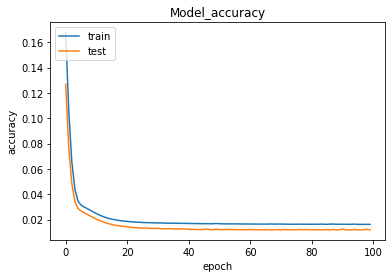

In [142]:
# Accuracy plot 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

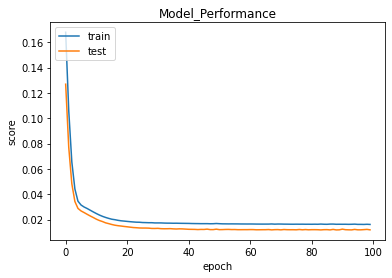

In [143]:
# Accuracy plot 
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model_Performance')
plt.ylabel('score')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [144]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [145]:
X_.isnull().sum()

Completed Jobs    0
tech_count        0
TMAX              0
Avg Sales         0
dtype: int64

In [146]:


X_=scaler.fit_transform(X_)


In [147]:
y_pred_1 = model.predict(X_test)

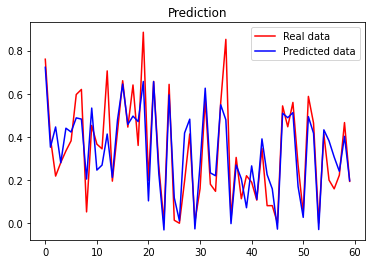

In [148]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred_1, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [149]:
y_pred_2=model.predict(X_)

In [150]:
y_=y_.values
y_=y_.reshape(-1,1)

In [151]:
y_=scaler.fit_transform(y_)

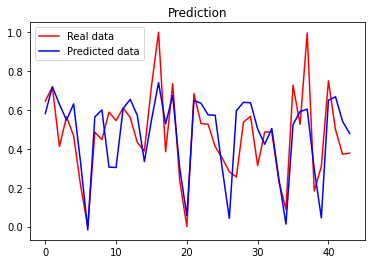

In [152]:
plt.plot(y_, color = 'red', label = 'Real data')
plt.plot(y_pred_2, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [153]:
y_pred_2=scaler.inverse_transform(y_pred_2)

In [154]:
y_pred_2

array([[103194.4   ],
       [127745.77  ],
       [111619.234 ],
       [ 97226.24  ],
       [112013.28  ],
       [ 57703.5   ],
       [ -2972.7078],
       [100141.29  ],
       [106505.016 ],
       [ 54301.984 ],
       [ 54000.176 ],
       [107884.51  ],
       [116179.39  ],
       [101545.81  ],
       [ 59445.684 ],
       [ 97154.58  ],
       [131456.55  ],
       [ 93763.69  ],
       [119763.29  ],
       [ 52960.83  ],
       [ 10010.507 ],
       [115098.74  ],
       [112602.68  ],
       [102037.47  ],
       [101664.53  ],
       [ 52947.71  ],
       [  7567.564 ],
       [105861.555 ],
       [113483.93  ],
       [113064.484 ],
       [ 89165.39  ],
       [ 75205.53  ],
       [ 89533.8   ],
       [ 43529.746 ],
       [  2381.535 ],
       [ 93078.586 ],
       [105072.31  ],
       [107192.02  ],
       [ 52570.21  ],
       [  8029.7944],
       [115370.625 ],
       [118505.51  ],
       [ 96063.625 ],
       [ 85107.65  ]], dtype=float32)

In [155]:
y_=scaler.inverse_transform(y_)

In [156]:
y_

array([[1.1453421e+05],
       [1.2741210e+05],
       [7.3107940e+04],
       [1.0033570e+05],
       [8.2920440e+04],
       [3.6992000e+04],
       [3.2600000e+02],
       [8.6287170e+04],
       [7.9380380e+04],
       [1.0450901e+05],
       [9.6828960e+04],
       [1.0832711e+05],
       [9.9625260e+04],
       [7.6878350e+04],
       [6.9089170e+04],
       [1.2821029e+05],
       [1.7741042e+05],
       [6.8424710e+04],
       [1.3040640e+05],
       [4.1651850e+04],
       [1.0295000e+02],
       [1.2132892e+05],
       [9.4156550e+04],
       [9.3428490e+04],
       [7.3106960e+04],
       [6.2484030e+04],
       [5.0088000e+04],
       [4.5289920e+04],
       [9.5437440e+04],
       [1.0067486e+05],
       [5.5735080e+04],
       [8.6421800e+04],
       [8.6421800e+04],
       [4.1343950e+04],
       [1.5788000e+04],
       [1.2898555e+05],
       [9.3402160e+04],
       [1.7674702e+05],
       [3.2502400e+04],
       [5.5111850e+04],
       [1.3304285e+05],
       [8.853889

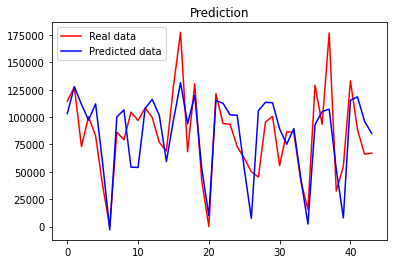

In [157]:
plt.plot(y_, color = 'red', label = 'Real data')
plt.plot(y_pred_2, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [158]:
from sklearn.metrics import mean_squared_error

In [159]:
from sklearn.metrics import mean_absolute_error

In [160]:
mean_absolute_error(y_,y_pred_2)

22137.5871706321

In [161]:
np.sqrt(mean_squared_error(y_,y_pred_2))

27506.48571192816

In [162]:
np.sqrt(mean_squared_error(y_test,y_pred_1))

0.10934878708808263

In [163]:
from keras.models import load_model

In [164]:
model.save('forecast_2.h5')

In [165]:
loading_1=load_model('forecast_2.h5')

In [166]:
X_

array([[0.71428571, 0.41558442, 0.32432432, 0.57936626],
       [0.84415584, 0.7012987 , 0.56756757, 0.42522791],
       [0.69480519, 0.55844156, 0.62162162, 0.50660002],
       [0.75974026, 0.81818182, 0.35135135, 0.58050005],
       [0.74675325, 0.38961039, 0.37837838, 0.61223928],
       [0.33766234, 0.12987013, 0.56756757, 0.4277632 ],
       [0.        , 0.01298701, 0.89189189, 0.06199236],
       [0.68181818, 0.57142857, 0.89189189, 0.26351954],
       [0.65584416, 0.54545455, 0.64864865, 0.49953046],
       [0.31818182, 0.20779221, 0.51351351, 0.89144246],
       [0.64285714, 0.80519481, 0.08108108, 1.        ],
       [0.81818182, 0.62337662, 0.27027027, 0.40262763],
       [0.75974026, 0.5974026 , 0.48648649, 0.50006332],
       [0.67532468, 0.46753247, 0.37837838, 0.57610091],
       [0.37662338, 0.23376623, 0.37837838, 0.88138651],
       [0.80519481, 0.79220779, 0.27027027, 0.60106925],
       [0.88311688, 0.44155844, 0.51351351, 0.35180188],
       [0.61688312, 0.5974026 ,

In [167]:

p=loading_1.predict([[0.68831169, 0.76623377, 0.43243243, 0.34362452]])


In [168]:
scaler.inverse_transform(p)

array([[96063.64]], dtype=float32)

In [170]:
X_[11:20]

array([[0.81818182, 0.62337662, 0.27027027, 0.40262763],
       [0.75974026, 0.5974026 , 0.48648649, 0.50006332],
       [0.67532468, 0.46753247, 0.37837838, 0.57610091],
       [0.37662338, 0.23376623, 0.37837838, 0.88138651],
       [0.80519481, 0.79220779, 0.27027027, 0.60106925],
       [0.88311688, 0.44155844, 0.51351351, 0.35180188],
       [0.61688312, 0.5974026 , 0.54054054, 0.34290542],
       [0.77272727, 0.61038961, 0.59459459, 0.41926208],
       [0.2987013 , 0.14285714, 0.62162162, 0.44757644]])

In [171]:
!pip install -U keras-tuner


     |████████████████████████████████| 71kB 3.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=b761948f841f978aaaa4ab18eac3cb9635e292e7c334ae8008499b57e41be8d4
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=861d4d7186118288ead881df5153e1e4bce7c8195488f0866a3c3403f9760310
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [172]:
from kerastuner.tuners import RandomSearch


In [173]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 40)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=1024,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='MeanSquaredError',
        metrics=['MeanSquaredError'])
    return model

In [174]:
from tensorflow import keras
from kerastuner import HyperModel


In [176]:
tuner = RandomSearch(build_model,objective='val_loss',max_trials=10,executions_per_trial=3)


In [177]:
tuner.search(X_train,y_train,epochs=100,validation_data= (X_test,y_test))


Trial 10 Complete [00h 00m 25s]
val_loss: 0.010832091172536215

Best val_loss So Far: 0.010629584081470966
Total elapsed time: 00h 25m 12s
INFO:tensorflow:Oracle triggered exit


In [178]:
tuner.results_summary()


Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layers: 8
units_0: 416
units_1: 832
learning_rate: 0.01
units_2: 352
units_3: 512
units_4: 512
units_5: 576
units_6: 320
units_7: 256
units_8: 416
units_9: 832
units_10: 704
units_11: 992
units_12: 288
units_13: 32
units_14: 864
units_15: 448
units_16: 640
units_17: 352
units_18: 320
units_19: 768
units_20: 96
units_21: 832
units_22: 736
units_23: 352
units_24: 928
units_25: 480
units_26: 64
units_27: 160
units_28: 864
units_29: 512
units_30: 480
units_31: 608
units_32: 736
units_33: 352
units_34: 512
units_35: 896
units_36: 736
units_37: 960
Score: 0.010629584081470966
Trial summary
Hyperparameters:
num_layers: 3
units_0: 576
units_1: 96
learning_rate: 0.001
units_2: 672
units_3: 32
units_4: 800
units_5: 384
units_6: 416
units_7: 832
units_8: 896
units_9: 448
units_10: 160
units_11: 480
units_12: 192
units_13: 1024
units_14: 416
units_15: 

In [179]:
from keras.optimizers import Adam

In [180]:
X_


array([[0.71428571, 0.41558442, 0.32432432, 0.57936626],
       [0.84415584, 0.7012987 , 0.56756757, 0.42522791],
       [0.69480519, 0.55844156, 0.62162162, 0.50660002],
       [0.75974026, 0.81818182, 0.35135135, 0.58050005],
       [0.74675325, 0.38961039, 0.37837838, 0.61223928],
       [0.33766234, 0.12987013, 0.56756757, 0.4277632 ],
       [0.        , 0.01298701, 0.89189189, 0.06199236],
       [0.68181818, 0.57142857, 0.89189189, 0.26351954],
       [0.65584416, 0.54545455, 0.64864865, 0.49953046],
       [0.31818182, 0.20779221, 0.51351351, 0.89144246],
       [0.64285714, 0.80519481, 0.08108108, 1.        ],
       [0.81818182, 0.62337662, 0.27027027, 0.40262763],
       [0.75974026, 0.5974026 , 0.48648649, 0.50006332],
       [0.67532468, 0.46753247, 0.37837838, 0.57610091],
       [0.37662338, 0.23376623, 0.37837838, 0.88138651],
       [0.80519481, 0.79220779, 0.27027027, 0.60106925],
       [0.88311688, 0.44155844, 0.51351351, 0.35180188],
       [0.61688312, 0.5974026 ,

In [ ]:
num_layers: 8
units_0: 416
units_1: 832
learning_rate: 0.01
units_2: 352
units_3: 512
units_4: 512
units_5: 576
units_6: 320
units_7: 256
units_8: 416
units_9: 832
units_9: 832
units_10: 704
units_11: 992
units_12: 288
units_13: 32
units_14: 864
units_15: 448
units_16: 640
units_17: 352
units_18: 320
units_19: 768
units_20: 96
units_21: 832
units_22: 736
units_23: 352
units_24: 928
units_25: 480
units_26: 64
units_27: 160
units_28: 864
units_29: 512
units_30: 480
units_31: 608
units_32: 736
units_33: 352
units_34: 512
units_35: 896
units_36: 736
units_37: 960

In [206]:
model = Sequential()
model.add(Dense(416, activation = 'relu', input_dim =4))
model.add(Dense(832, activation = 'relu'))
model.add(Dense(352, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(576, activation = 'relu'))
model.add(Dense(320, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(416, activation = 'relu'))
model.add(Dense(832, activation = 'relu'))


model.add(Dense(1,activation = 'linear'))
model.compile(optimizer=Adam(lr=0.01), loss='MeanSquaredError', metrics = ['MeanSquaredError'])

In [207]:
hist=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
8/8 [==============================] - 1s 58ms/step - loss: 103.4149 - mean_squared_error: 103.4149 - val_loss: 0.1090 - val_mean_squared_error: 0.1090
Epoch 2/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0735 - mean_squared_error: 0.0735 - val_loss: 0.0607 - val_mean_squared_error: 0.0607
Epoch 3/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 4/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0448 - mean_squared_error: 0.0448 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 5/100
8/8 [==============================] - 0s 33ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 6/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 7/100
8/8 [===================

In [208]:
y_pr=model.predict(X_)

In [209]:
scaler.inverse_transform(y_pr)

array([[121818.44  ],
       [115334.78  ],
       [105046.516 ],
       [121537.7   ],
       [124408.805 ],
       [ 75275.95  ],
       [  6509.358 ],
       [ 76112.516 ],
       [ 98989.38  ],
       [ 66100.83  ],
       [117451.516 ],
       [123075.67  ],
       [116614.03  ],
       [116212.23  ],
       [ 74232.914 ],
       [129125.3   ],
       [121104.22  ],
       [ 90498.36  ],
       [109572.16  ],
       [ 71492.95  ],
       [ 20992.549 ],
       [102960.32  ],
       [103831.85  ],
       [ 87734.06  ],
       [ 76579.17  ],
       [ 61933.5   ],
       [  7510.7603],
       [ 79135.98  ],
       [105523.164 ],
       [108583.22  ],
       [ 79085.15  ],
       [102494.766 ],
       [104764.805 ],
       [ 32950.508 ],
       [ 14745.116 ],
       [147095.78  ],
       [137016.    ],
       [113845.53  ],
       [ 38458.336 ],
       [ 18986.922 ],
       [101836.375 ],
       [111238.38  ],
       [ 97880.15  ],
       [107651.72  ]], dtype=float32)

In [210]:
y_

array([[1.1453421e+05],
       [1.2741210e+05],
       [7.3107940e+04],
       [1.0033570e+05],
       [8.2920440e+04],
       [3.6992000e+04],
       [3.2600000e+02],
       [8.6287170e+04],
       [7.9380380e+04],
       [1.0450901e+05],
       [9.6828960e+04],
       [1.0832711e+05],
       [9.9625260e+04],
       [7.6878350e+04],
       [6.9089170e+04],
       [1.2821029e+05],
       [1.7741042e+05],
       [6.8424710e+04],
       [1.3040640e+05],
       [4.1651850e+04],
       [1.0295000e+02],
       [1.2132892e+05],
       [9.4156550e+04],
       [9.3428490e+04],
       [7.3106960e+04],
       [6.2484030e+04],
       [5.0088000e+04],
       [4.5289920e+04],
       [9.5437440e+04],
       [1.0067486e+05],
       [5.5735080e+04],
       [8.6421800e+04],
       [8.6421800e+04],
       [4.1343950e+04],
       [1.5788000e+04],
       [1.2898555e+05],
       [9.3402160e+04],
       [1.7674702e+05],
       [3.2502400e+04],
       [5.5111850e+04],
       [1.3304285e+05],
       [8.853889

In [211]:
model.save('forecast_nueral_fs.h5')

In [212]:
loading_3=load_model('forecast_nueral_fs.h5')